In [1]:
from models import MLP, Tester
import numpy as np
import pandas as pd

### Import datasets

In [2]:
steps_train = pd.read_csv('data/steps-large-training.csv')
steps_test = pd.read_csv('data/steps-large-test.csv')

square_train = pd.read_csv('data/square-simple-training.csv')
square_test = pd.read_csv('data/square-simple-test.csv')

### Setting up a 1-5-1 model

In [4]:
weights0 = np.array([[1e6], [1e6], [1e6], [1e6], [1e6]])
biases0 = np.array([9*1e6, 3/2*1e6, 1/2*1e6, -1/2*1e6, -3/2*1e6])
weights1 = np.array([[-160, 80, 80, 80, 80]])

In [5]:
# x = np.array([steps_train["x"]])
# y = np.array([steps_train["y"]])

# outputs = np.dot(weights0, x)
# outputs += biases0[:, np.newaxis]

model = MLP(1, [5], 1)
model.layers[0].set_weights(weights0)
model.layers[0].set_biases(biases0)
model.layers[1].set_weights(weights1)

#### Performance on train set

[-1.4813543]
[1.00000000e+000 1.00000000e+000 7.12457641e-218 7.12457641e-218
 7.12457641e-218]
(1, 10000)
[-80.]
mse: 0.022223735468825244


<module 'matplotlib.pyplot' from 'c:\\Users\\kornel\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

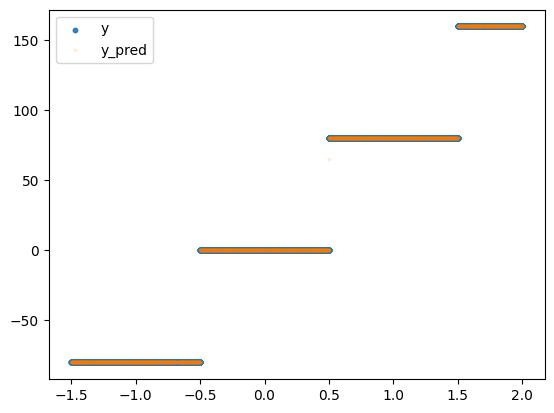

In [6]:
tester = Tester(df=steps_train, model=model)
tester.report()
tester.plot()

#### Performance on test set

[1.70698997]
[1. 1. 1. 1. 1.]
(1, 1000)
[160.]
mse: 0.0


<module 'matplotlib.pyplot' from 'c:\\Users\\kornel\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

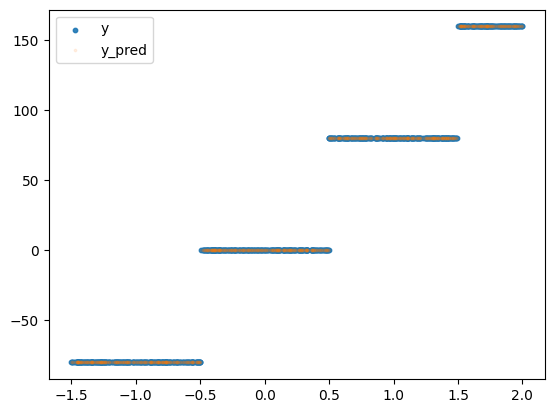

In [7]:
tester = Tester(df=steps_test, model=model)
tester.report()
tester.plot()

### Setting up a 1-5-5-1 model

In [8]:
weights0 = np.array([[1e6], [1e6], [1e6], [1e6], [1e6]])
biases0 = np.array([9*1e6, 3/2*1e6, 1/2*1e6, -1/2*1e6, -3/2*1e6])
weights1 = np.array([[1e3, 0, 0, 0, 0], [0, 1e3, 0, 0, 0], [0, 0, 1e3, 0, 0], [0, 0, 0, 1e3, 0], [0, 0, 0, 0, 1e3]])
biases1 = np.array([-1e2, -1e2, -1e2, -1e2, -1e2])
weights2 = np.array([[-160, 80, 80, 80, 80]])

model = MLP(1, [5, 5], 1)
model.layers[0].set_weights(weights0)
model.layers[0].set_biases(biases0)
model.layers[1].set_weights(weights1)
model.layers[1].set_biases(biases1)
model.layers[2].set_weights(weights2)


[-1.4813543]
[1.00000000e+000 1.00000000e+000 7.12457641e-218 7.12457641e-218
 7.12457641e-218]
[1.00000000e+00 1.00000000e+00 3.72007598e-44 3.72007598e-44
 3.72007598e-44]
(1, 10000)
[-80.]
mse: 2.4622287003700037e-84


<module 'matplotlib.pyplot' from 'c:\\Users\\kornel\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

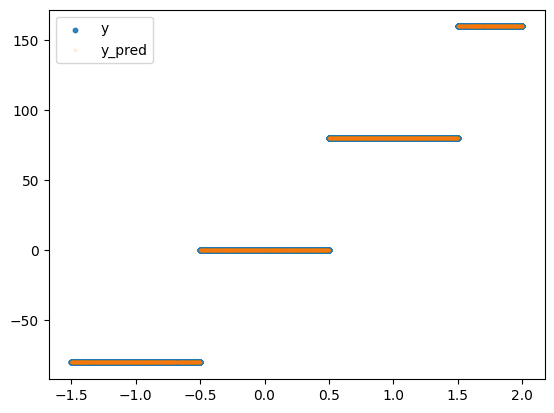

In [9]:
tester = Tester(df=steps_train, model=model)
tester.report()
tester.plot()

[1.70698997]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
(1, 1000)
[160.]
mse: 2.4710856381411185e-84


<module 'matplotlib.pyplot' from 'c:\\Users\\kornel\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

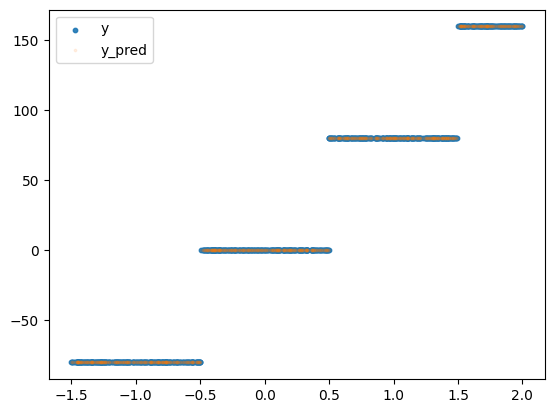

In [10]:
tester = Tester(df=steps_test, model=model)
tester.report()
tester.plot()

## Zbiór squares

In [114]:
weights0 = np.array([[0.42], [0.1], [0], [-0.1], [-0.42]])
biases0 = np.array([0, 0, 0, 0, 0])
weights1 = np.array([[10, 0, 0, 0, 0], [0, 10, 0, 0, 0], [0, 0, 10, 0, 0], [0, 0, 0, 10, 0], [0, 0, 0, 0, 10]])
biases1 = np.array([-8, -8, -8, -8, -8])
a = 1900
b = -581.5
weights2 = np.array([[a, a, a, a, a]])
biases2 = np.array([b])

model = MLP(1, [5, 5], 1)
model.layers[0].set_weights(weights0)
model.layers[0].set_biases(biases0)
model.layers[1].set_weights(weights1)
model.layers[1].set_biases(biases1)
model.layers[2].set_weights(weights2)
model.layers[2].set_biases(biases2)

[[-0.98043688 -1.21907437  0.12424343]]
[[0.39848455 0.37472216 0.5130426 ]
 [0.47550869 0.46956083 0.50310605]
 [0.5        0.5        0.5       ]
 [0.52449131 0.53043917 0.49689395]
 [0.60151545 0.62527784 0.4869574 ]]
[[0.01772049 0.01402515 0.05367829]
 [0.03751011 0.03542083 0.04884897]
 [0.04742587 0.04742587 0.04742587]
 [0.0598     0.063233   0.04604223]
 [0.12080325 0.14839797 0.04186951]]
[[ -43.3065288     4.65538611 -129.55674171]]
mse: 0.7785250915568951


<module 'matplotlib.pyplot' from 'c:\\Users\\kornel\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

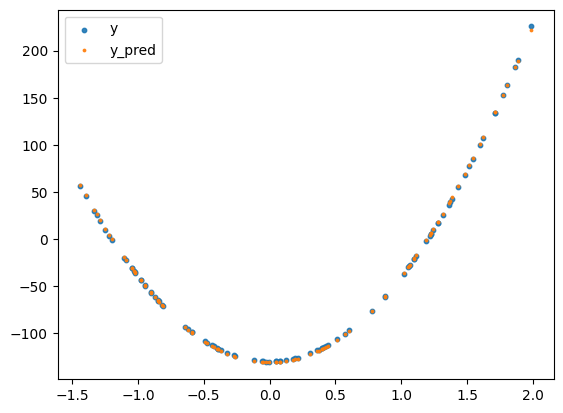

In [115]:
tester = Tester(df=square_test, model=model)
tester.report()
tester.plot()